# Check if astroquery matches JPL
# Check if JPL/astroquery matches spice

In [27]:
import sys
import datetime
import matplotlib.pyplot as plt
sys.path.insert(0, r"/mnt/c/Users/Trez/Desktop/tudat-bundle/tudatpy/")

# Tudat imports for propagation and estimation
from tudatpy.kernel.interface import spice
from tudatpy.kernel import numerical_simulation,constants
from tudatpy.kernel.numerical_simulation import environment_setup
from tudatpy.kernel.numerical_simulation import propagation_setup
from tudatpy.kernel.numerical_simulation import estimation, estimation_setup
from tudatpy.kernel.numerical_simulation.estimation_setup import observation

# import MPC interface
from tudatpy.data.mpc import BatchMPC
from tudatpy.data.horizons import HorizonsQuery, HorizonsBatch

# other useful modules
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [28]:
# SPICE KERNELS
spice.load_standard_kernels()

# HI

TEST
[-3.25096611e+11  2.79292980e+10  8.68085670e+09]
TEST
 targetname    datetime_jd    ...       range              range_rate      
    ---             d         ...         AU                 AU / d        
----------- ----------------- ... ------------------ ----------------------
Venus (299)         2458845.0 ...  1.302946822941185   -0.00549334330361652
Venus (299) 2458867.346938775 ...  1.172811618738538  -0.006140538933534438
Venus (299) 2458889.693877551 ...  1.028267122689432  -0.006786789827960792
Venus (299) 2458912.040816327 ... 0.8701589359545471  -0.007356657252476098
Venus (299) 2458934.387755102 ... 0.7012601541230576  -0.007710322002618419
Venus (299) 2458956.734693877 ... 0.5291640651622516  -0.007546670308642828
Venus (299) 2458979.081632653 ... 0.3738955870186632  -0.005959989236210491
Venus (299) 2459001.428571429 ... 0.2897905613504602 -0.0008716328914826352
Venus (299) 2459023.775510204 ... 0.3432251752810696   0.005098632967357943
Venus (299) 2459046.12244897

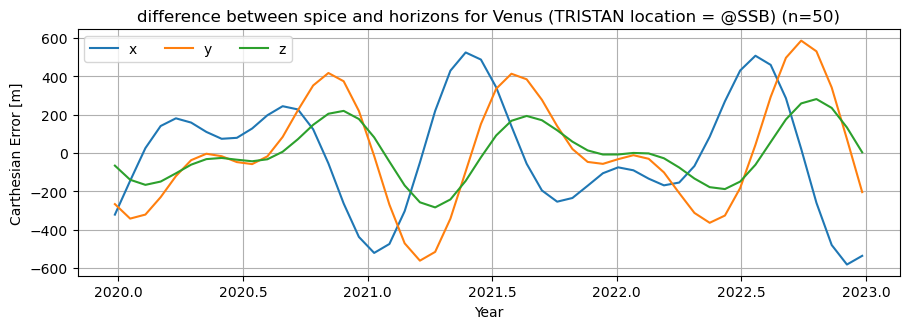

Venus (299)


In [29]:
start = 20 * 365 * 86400
end = 23 * 365 * 86400

npoints = 50

times = np.linspace(start, end, npoints)
times_plot = times / (86400 * 365.25) + 2000

query = HorizonsQuery(
    query_id="299", location="@399", epoch_list=list(times), extended_query=True
)
ref = "ECLIPJ2000"
# ref = "J2000"
# refHor = "ecliptic" if ref == "ECLIPJ2000" else "earth"
# refHor = "ecliptic"

spice_states = []
estimation_states = query.cartesian(frame_orientation=ref)[:, 1:]

# times = query.carthesian(refplane=refHor)[:, 0]

for time in times:
    # from spice
    state_spice = spice.get_body_cartesian_state_at_epoch(
        "Venus", "Earth", ref, "NONE", time
    )
    spice_states.append(state_spice)


error = (np.array(spice_states) - np.array(estimation_states))
vec = query.vectors(frame_orientation=ref)
test = np.array([-1.360322710769130e00, -8.307597589037438e-01, 1.574194092725084e-02])
test2 = (
    np.array([-1.360322710769130e00, -8.307597589037438e-01, 1.574194092725084e-02])
    * 149597870.700
    * 1000
)

print("TEST")
print(test2 - spice_states[0][0:3])
print("TEST")

print(vec)

print(estimation_states[0])
print("cart")
print(estimation_states[0][0])
print(estimation_states[0][1])
print(estimation_states[0][2])
print("vec")
print(vec["x"][0] - test[0])  # *(constants.ASTRONOMICAL_UNIT))
print(vec["y"][0] - test[1])  # *(constants.ASTRONOMICAL_UNIT))
print(vec["z"][0] - test[2])  # *(constants.ASTRONOMICAL_UNIT))
print(vec[["datetime_jd", "x", "y", "z"]])
fig, ax = plt.subplots(1, 1, figsize=(9, 3))

ax.plot(times_plot, error[:, 0], label="x")
ax.plot(times_plot, error[:, 1], label="y")
ax.plot(times_plot, error[:, 2], label="z")
print("HIII")
print(spice_states[0][0] - (-1.360316408157390 * constants.ASTRONOMICAL_UNIT))
print("HIII")
ax.grid()
ax.legend(ncol=3)

plt.tight_layout()
ax.set_title(
    f"difference between spice and horizons for Venus (TRISTAN location = @SSB) (n={npoints})"
)
ax.set_ylabel("Carthesian Error [m]")
ax.set_xlabel("Year")

plt.show()

print(query._target_full_name)

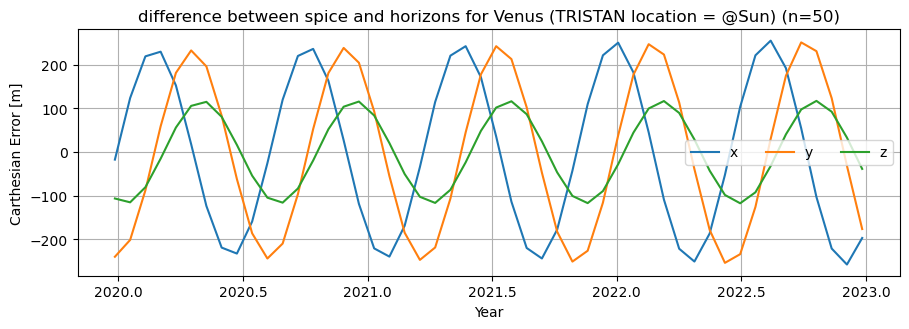

In [30]:
start = 20 * 365 * 86400
end = 23 * 365 * 86400

npoints = 50

times = np.linspace(start, end, npoints)
times_plot = times / (86400 * 365.25) + 2000

query = HorizonsQuery(
    query_id="299", location="@Sun", epoch_list=list(times), extended_query=True, query_type="default"
)
ref = "ECLIPJ2000"
# ref = "J2000"
# refHor = "ecliptic" if ref == "ECLIPJ2000" else "earth"
# refHor = "ecliptic"

spice_states = []
estimation_states = query.cartesian(frame_orientation=ref)[:, 1:]

# times = query.carthesian(refplane=refHor)[:, 0]

for time in times:
    # from spice
    state_spice = spice.get_body_cartesian_state_at_epoch(
        "Venus", "Sun", ref, "NONE", time
    )
    spice_states.append(state_spice)


error = (np.array(spice_states) - np.array(estimation_states))

fig, ax = plt.subplots(1, 1, figsize=(9, 3))

ax.plot(times_plot, error[:, 0], label="x")
ax.plot(times_plot, error[:, 1], label="y")
ax.plot(times_plot, error[:, 2], label="z")

ax.grid()
ax.legend(ncol=3)

plt.tight_layout()
ax.set_title(
    f"difference between spice and horizons for Venus (TRISTAN location = @Sun) (n={npoints})"
)
ax.set_ylabel("Carthesian Error [m]")
ax.set_xlabel("Year")

plt.show()